# Проект по теме "Принятие решений в бизнесе"

**Описание проекта**

Являясь аналитиком крупного интернет-магазина, вы вместе с отделом маркетинга  подготовили список гипотез для увеличения выручки.

В нашем распоряжении :
- файл `hypothesis.csv` - 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort;
- результаты A/B-теста, которые находятся в файлах `orders.csv` и `visitors.csv`.

**Цель исследования**

Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать получившиеся результаты.

**Ход исследования**

Исследование пройдёт в три этапа:
1. Приоритезация гипотез.
2. Анализ A/B-теста.
3. Общий вывод.

## Шаг 1. Приоритизация гипотез.

### Задание 1.1. Примените фреймворк ICE для приоритизации гипотез. Отсортируйте гипотезы  по убыванию приоритета.

In [157]:
# импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import scipy.stats as stats

In [158]:
pd.set_option('display.max_columns', None) # код для того, чтобы отображались все столбцы датафрейма при выводе их на экран

In [159]:
try:
  hypothesis = pd.read_csv('/datasets/hypothesis.csv')  # откроем файл '/datasets/hypothesis.csv'
# и сохраним его в переменную hypothesis
except:
  hypothesis = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')

In [160]:
pd.set_option('max_colwidth', 200) # код для того, чтобы вывести названия гипотез целиком

In [161]:
hypothesis # отобразим датафрейм hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Видим, чо шкала для приоритизации гипотез выбрана от 0 до 10.
Применим фреймворк ICE для приоритизации гипотез, а затем отсортируем гипотезы по убыванию приоритета.

In [162]:
hypothesis['ICE'] = round(hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts'],2)
hypothesis.sort_values(by='ICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


### Задание 1.2. Примените фреймворк RICE для приоритизации гипотез. Отсортируйте гипотезы по убыванию приоритета.

In [163]:
hypothesis['RICE'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
hypothesis.sort_values(by='RICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


### Задание 1.3. Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

В датафрейме hypothesis отображены 9 гипотез по увеличению выручки интернет-магазина. При использовании фреймворка ICE самыми приоритетными гипотезами стали гипотезы под номером 8,0,7. При использовании фреймворка RICE самыми приоритетными гипотезами стали гипотезы под номером 7, 2, 0 и 6.   
Данные различия в двух видах приоритизации гипотез объясняются тем,что в методе RICE в отличие от ICE помимо таких компонентов, как Impact (влияние), Confidence (уверенность) и Efforts (усилия), применяется компонент Reach (охват). Параметр Reach (охват) показывает, скольких пользователей затронет изменение, которое хотим внести.
Первой рекомендую тестировать гипотезу под номером 7, так как она на первом месте при применении метода приоритизации RICE. Рекомендую использовать метод RICE для приоритизации гипотез, так как этот метод учитывает дополнительно такой параметр, как Reach, в отличие от ICE, что даёт более полную картину при приоритизации гипотез.

**Вывод к шагу 1**  
При использовании фреймворка ICE самыми приоритетными гипотезами стали гипотезы под номером 8,0,7. При использовании фреймворка RICE самыми приоритетными гипотезами стали гипотезы под номером 7, 2, 0 и 6.  
Данные различия в двух видах приоритизации гипотез объясняются тем,что в методе RICE в отличие от ICE помимо таких компонентов, как Impact (влияние), Confidence (уверенность) и Efforts (усилия), применяется компонент Reach (охват).

## Шаг 2. Анализ A/B-теста

### Загрузка датафреймов orders и visitors и предобработка данных

**Загрузим датафрейм orders**

In [164]:
try:
  orders = pd.read_csv('/datasets/orders.csv')  # откроем файл '/datasets/orders.csv' и сохраним его в переменную orders
except:
  orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')

In [165]:
orders.head()  # отобразим первые 5 строк датафрейма orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [166]:
orders.info() # отобразим информацию о датафрейме orders

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


Изменим тип данных для столбца `date` в датафрейме orders.

In [167]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [168]:
orders.info() # убедимся, что в датафрейме orders нет пропусков

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


Выполним проверку данных на наличие явных дубликатов

In [169]:
orders.duplicated().sum()

0

Явных дубликатов в датафрейме orders не обнаружено.

**Загрузим датафрейм visitors**

In [170]:
try:
  visitors = pd.read_csv('/datasets/visitors.csv')  # откроем файл '/datasets/visitors.csv' и сохраним его в переменную visitors
except:
  visitors = pd.read_csv('https://code.s3.yandex.net//datasets/visitors.csv')

In [171]:
visitors.head() # отобразим первые 5 строк датафрейма visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [172]:
visitors.info() # отобразим основную информацию о датафрейме visitors и убедимся, что в нём отсутствуют пропуски

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Изменим тип данных столбца `date` датафрейма visitors.

In [173]:
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

Выполним проверку данных на наличие явных дубликатов

In [174]:
visitors.duplicated().sum()

0

В датафрейме visitors явных дубликатов не обнаружено

**Посмотрим, есть ли повторяющиеся пользователи, которые относятся и к группе A, и к группе B**

In [175]:
mergedVisitors = orders[orders['group']=='A'].merge(orders[orders['group']=='B'], on='visitorId',suffixes=('A','B'))

print(f"Количество покупателей, которые участвовали и в группе A, и в группе B, составляет: \
{len(mergedVisitors['visitorId'].unique())} человек")

Количество покупателей, которые участвовали и в группе A, и в группе B, составляет: 58 человек


In [176]:
print(f"Процент покупателей, относящихся и к группе A, и к группе B к общему числу уникальных покупателей из группы A, \
составляет: {len(mergedVisitors['visitorId'].unique()) / len(orders[orders['group']=='A']['visitorId'].unique()):.2%}")

Процент покупателей, относящихся и к группе A, и к группе B к общему числу уникальных покупателей из группы A, составляет: 11.53%


In [177]:
print(f"Процент покупателей, относящихся и к группе A, и к группе B к общему числу уникальных покупателей из группы B, \
составляет: {len(mergedVisitors['visitorId'].unique()) / len(orders[orders['group']=='B']['visitorId'].unique()):.2%}")

Процент покупателей, относящихся и к группе A, и к группе B к общему числу уникальных покупателей из группы B, составляет: 9.90%


Поскольку таблица с визитами у нас содержит уже агрегированные данные, можно оставить таких пользователей в тесте.

### Задание 2.1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

In [178]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

In [179]:
# соберём агрегированные кумулятивные по дням данные о заказах
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'],
                                                                     orders['group'] == x['group'])]
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1)\
.sort_values(by=['date','group'])

In [180]:
ordersAggregated.head()

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


In [181]:
# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'],
                                                                         visitors['group'] == x['group'])]
                                       .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)\
.sort_values(by=['date','group'])

In [182]:
visitorsAggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [183]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Проверим, корректно ли был создан датафрейм cumulativeData. Например, совпадают ли минимальная и максимальная даты в этом датафрейме с минимальной и максимальной датой в исходных данных.

In [184]:
print(f"Минимильная и максимальная дата в датафрейме orders: \
{orders['date'].min().date()}, {orders['date'].max().date()}")

print(f"Минимильная и максимальная дата в датафрейме visitors: \
{visitors['date'].min().date()}, {visitors['date'].max().date()}")

print(f"Минимильная и максимальная дата в датафрейме cumulativeData: \
{cumulativeData['date'].min().date()}, {cumulativeData['date'].max().date()}")

if orders['date'].min().date() == visitors['date'].min().date() == cumulativeData['date'].min().date():
    print('Минимальные даты в датафрейме cumulativeData и в исходных датафреймах совпадают.')
else:
    print('Минимальные даты в датафрейме cumulativeData и в исходных датафреймах не совпадают.')

if orders['date'].max().date() == visitors['date'].max().date() == cumulativeData['date'].max().date():
    print('Максимальные даты в датафрейме cumulativeData и в исходных датафреймах совпадают.')
else:
    print('Максимальные даты в датафрейме cumulativeData и в исходных датафреймах не совпадают.')

Минимильная и максимальная дата в датафрейме orders: 2019-08-01, 2019-08-31
Минимильная и максимальная дата в датафрейме visitors: 2019-08-01, 2019-08-31
Минимильная и максимальная дата в датафрейме cumulativeData: 2019-08-01, 2019-08-31
Минимальные даты в датафрейме cumulativeData и в исходных датафреймах совпадают.
Максимальные даты в датафрейме cumulativeData и в исходных датафреймах совпадают.


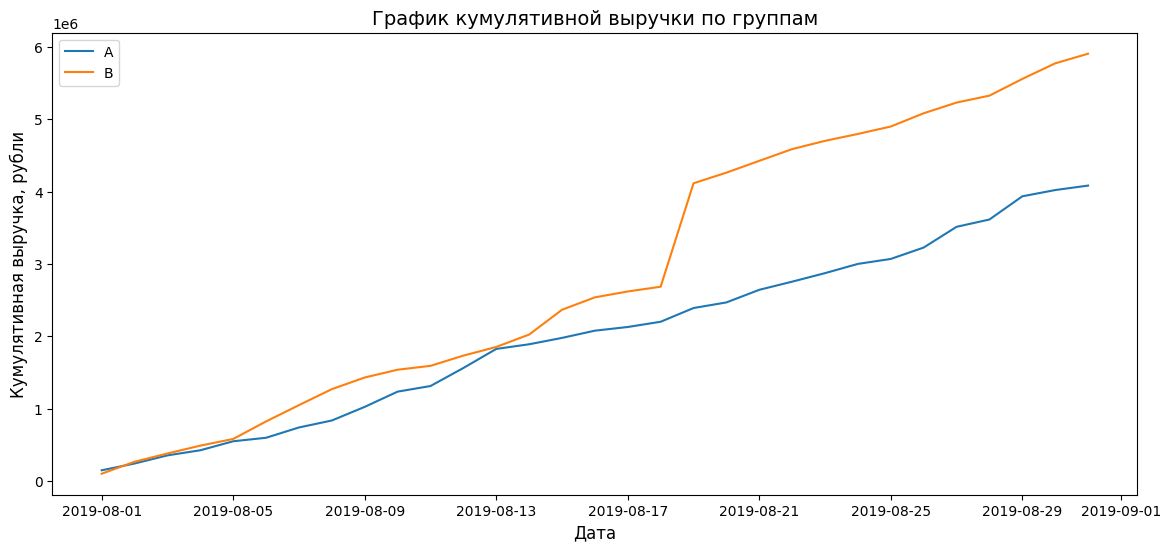

In [185]:
# Построим графики кумулятивной выручки по дням и группам A/B-тестирования:

plt.figure(figsize=(14, 6))

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()
plt.title('График кумулятивной выручки по группам', fontsize=14)
plt.xlabel("Дата", fontsize=12)
plt.ylabel("Кумулятивная выручка, рубли", fontsize=12);

Видим, что на графике кумулятивной выручки группа B выглядит лучше, чем группа A. Но на графике кумулятивной выручки группы B есть резкое увеличение. Это может быть связано с аномальными значениями или с ошибками в данных.

### Задание 2.2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

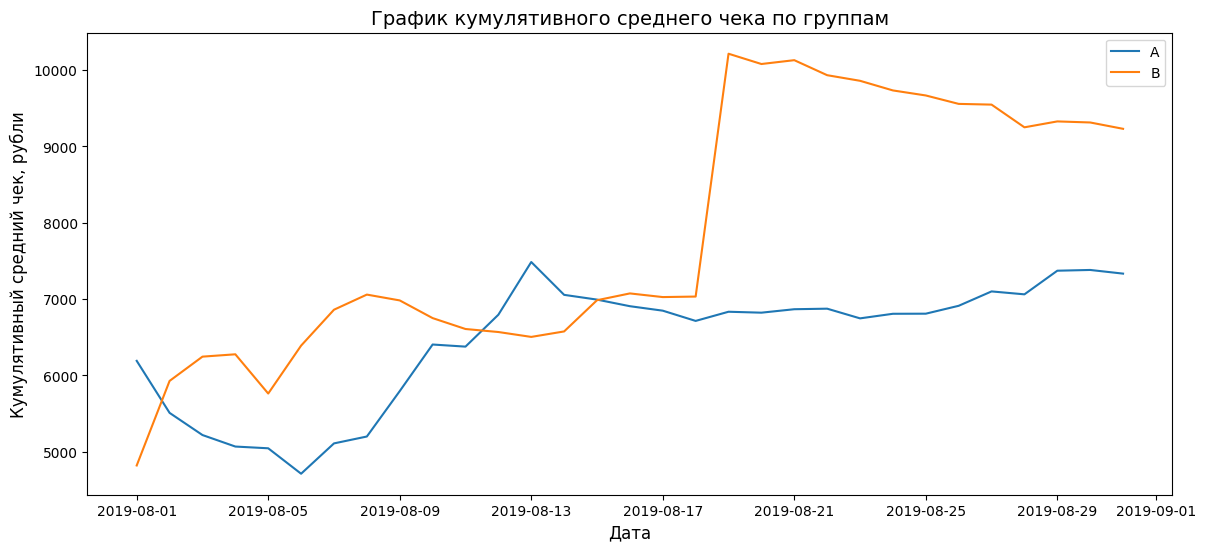

In [186]:
plt.figure(figsize=(14, 6))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.title('График кумулятивного среднего чека по группам', fontsize=14)
plt.xlabel("Дата", fontsize=12)
plt.ylabel("Кумулятивный средний чек, рубли", fontsize=12);

На графике кумулятиного среднего чека по группам видим, что кумулятивное значение среднего чека для группы B выше, чем для группы A. Заметно резкое увеличение среднего чека для группы B.

### Задание 2.3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

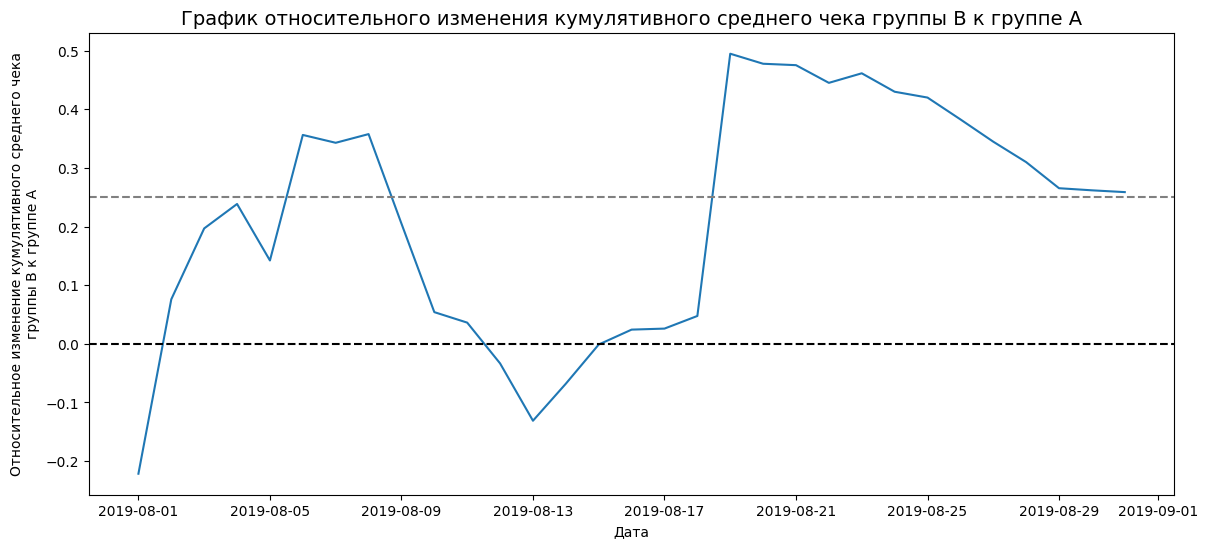

In [187]:
plt.figure(figsize=(14, 6))

# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left',
                                                   suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

plt.axhline(y=0.25, color='grey', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A', fontsize=14)
plt.xlabel("Дата", fontsize=10)
plt.ylabel('''Относительное изменение кумулятивного среднего чека
группы B к группе A''', fontsize=10);

В нескольких точках график различия между сегментами резко «скачет». Значит есть крупные заказы и выбросы.

### Задание 2.4. Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.

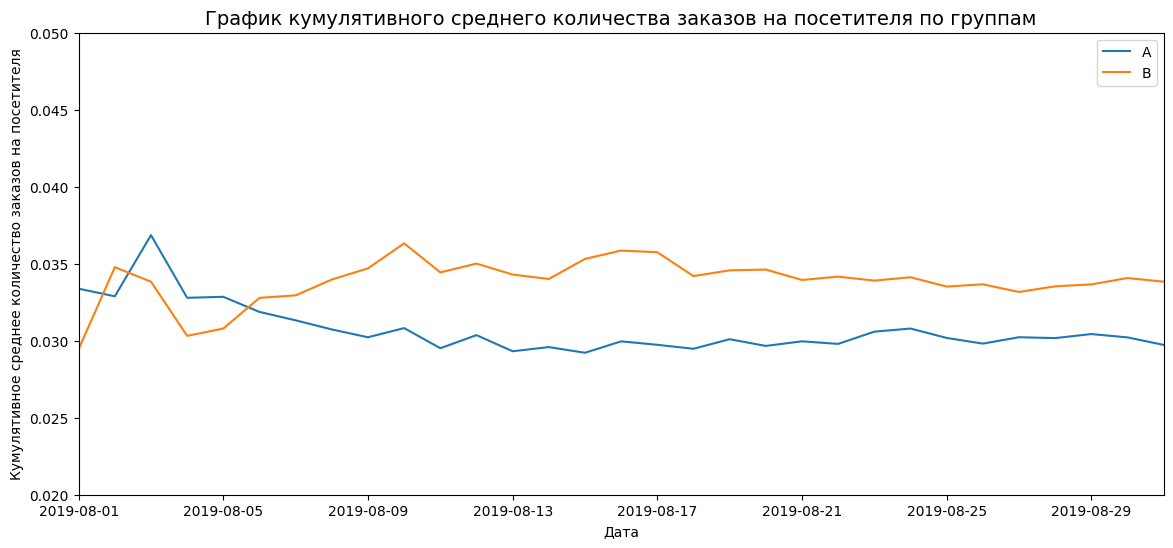

In [188]:
plt.figure(figsize=(14, 6))

# считаем кумулятивное среднее количество заказов на посетителя по группам
cumulativeData['ordersPerVisitor'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['ordersPerVisitor'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['ordersPerVisitor'], label='B')
plt.legend()

# задаем масштаб осей
plt.axis([pd.to_datetime('2019-08-01'), pd.to_datetime('2019-08-31'), 0.02, 0.05])
plt.title('График кумулятивного среднего количества заказов на посетителя по группам', fontsize=14)
plt.xlabel("Дата", fontsize=10)
plt.ylabel("Кумулятивное среднее количество заказов на посетителя", fontsize=10);

По сравнению с началом теста кумулятивное среднее количество заказов на посетителя для группы A к концу теста просело и зафиксировалось в районе 0.03. По сревнению с началом теста кумулятивное среднее количество заказов на посетителя для группы B к концу теста возрасло и зафиксировалось в районе 0.035.

### Задание 2.5. Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.

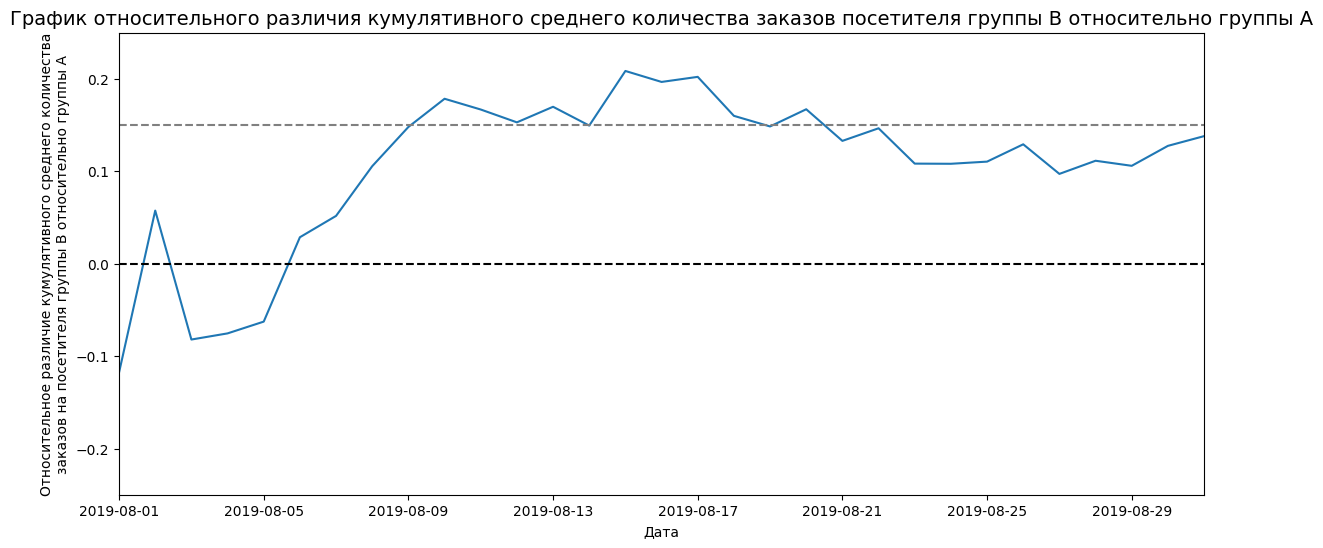

In [189]:
plt.figure(figsize=(14, 6))

mergedCumulativeOrdersPerVisitor = cumulativeDataA[['date','ordersPerVisitor']].merge(
    cumulativeDataB[['date','ordersPerVisitor']], left_on='date', right_on='date', how='left', suffixes=['A', 'B']
)

plt.plot(mergedCumulativeOrdersPerVisitor['date'], mergedCumulativeOrdersPerVisitor['ordersPerVisitorB']/
         mergedCumulativeOrdersPerVisitor['ordersPerVisitorA']-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.axis([pd.to_datetime('2019-08-01'), pd.to_datetime('2019-08-31'), -0.25, 0.25])
plt.title('График относительного различия кумулятивного среднего количества заказов посетителя группы B относительно \
группы A', fontsize=14)
plt.xlabel("Дата", fontsize=10)
plt.ylabel('''Относительное различие кумулятивного среднего количества
заказов на посетителя группы B относительно группы A''', fontsize=10);

В начале теста группа B проигрывала группе A, затем  вырвалась вперёд. Значение относительного изменения кумулятивного среднего количества заказов на посетителя для группы B относительно группы A к концу теста стабилизировалось на отметке 0.15.

### Задание 2.6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

In [190]:
# подсчитаем количество заказов по пользователям и посмотрим на результат

ordersByUsers = (orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['userId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

          userId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


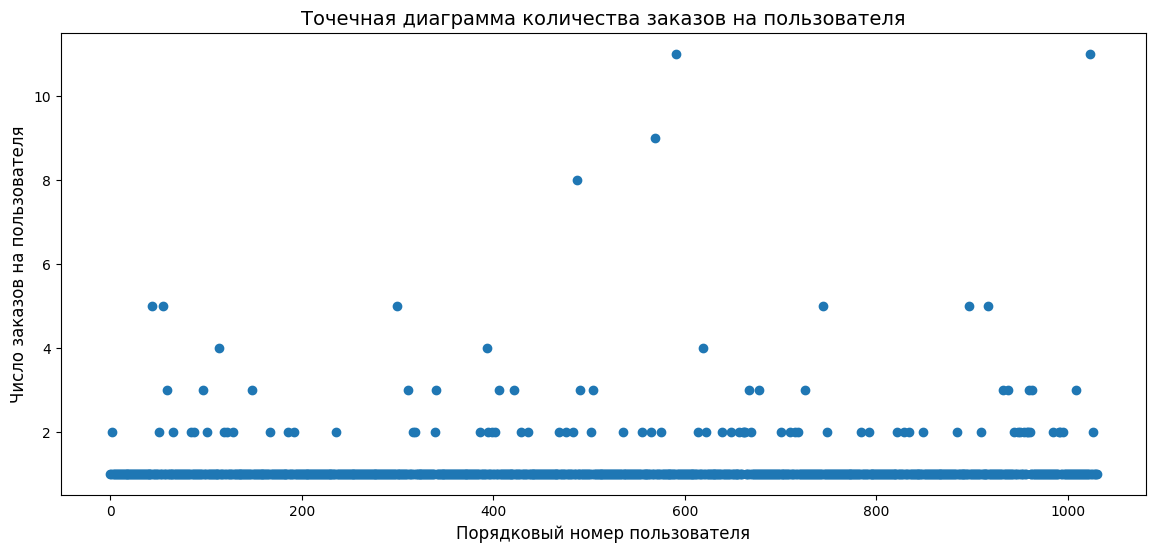

In [191]:
# Построим точечную диаграмму числа заказов на одного пользователя

x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize=(14, 6))
plt.scatter(x_values, ordersByUsers['orders'])

plt.title("Точечная диаграмма количества заказов на пользователя", fontsize=14)
plt.xlabel("Порядковый номер пользователя", fontsize=12)
plt.ylabel("Число заказов на пользователя", fontsize=12);

Видим, что у большинства пользователей по одному заказу. Пользователи с количеством заказов до 5 встречаются чаще, чем пользователи, у которых большее число заказов. Максимальное число заказов, которое встречается у одного пользователя, равно 11. Пользователи, у которых заказов от 5 до 11, встречаются редко.  

### Задание 2.7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [192]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

Не более 5% пользователей заказывали больше, чем 2 заказа. Не более 1% пользователей заказывали больше 4 заказов.
Выберем 4 заказа на одного пользователя за верхнюю границу числа заказов и отсеим аномальных пользователей по ней.

### Задание 2.8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

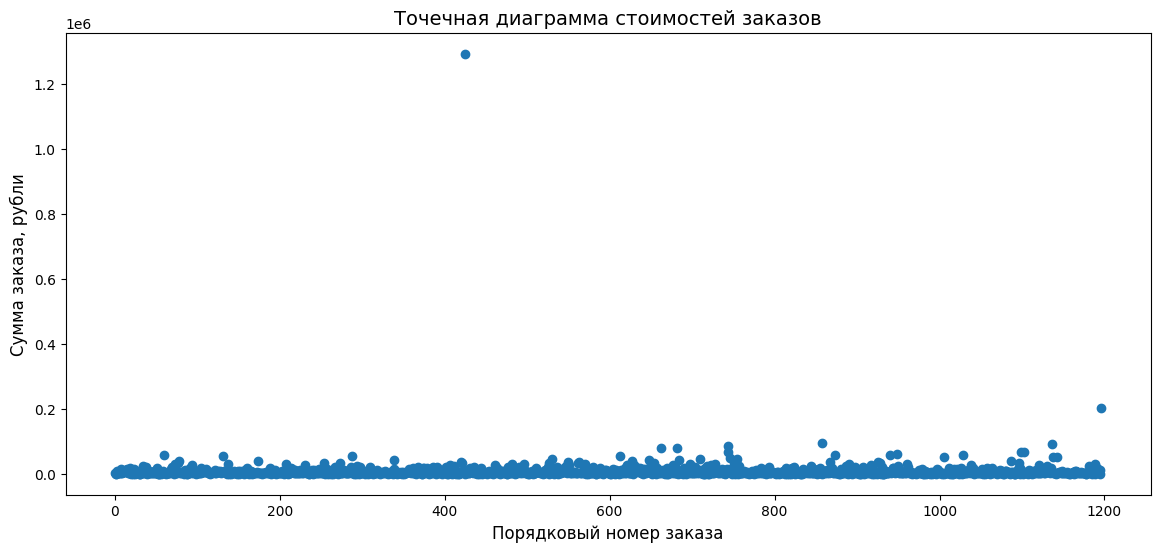

In [193]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(14, 6))
plt.scatter(x_values, orders['revenue'])

plt.title("Точечная диаграмма стоимостей заказов", fontsize=14)
plt.xlabel("Порядковый номер заказа", fontsize=12)
plt.ylabel("Сумма заказа, рубли", fontsize=12);

Видим, что есть один аномальный заказ, который сильно отличается от всех остальных.

Добавим еще один график, ограничив значения по оси Y. Чтобы двух явных выбросов не было видно, а мы могли рассмотреть основную часть заказов.


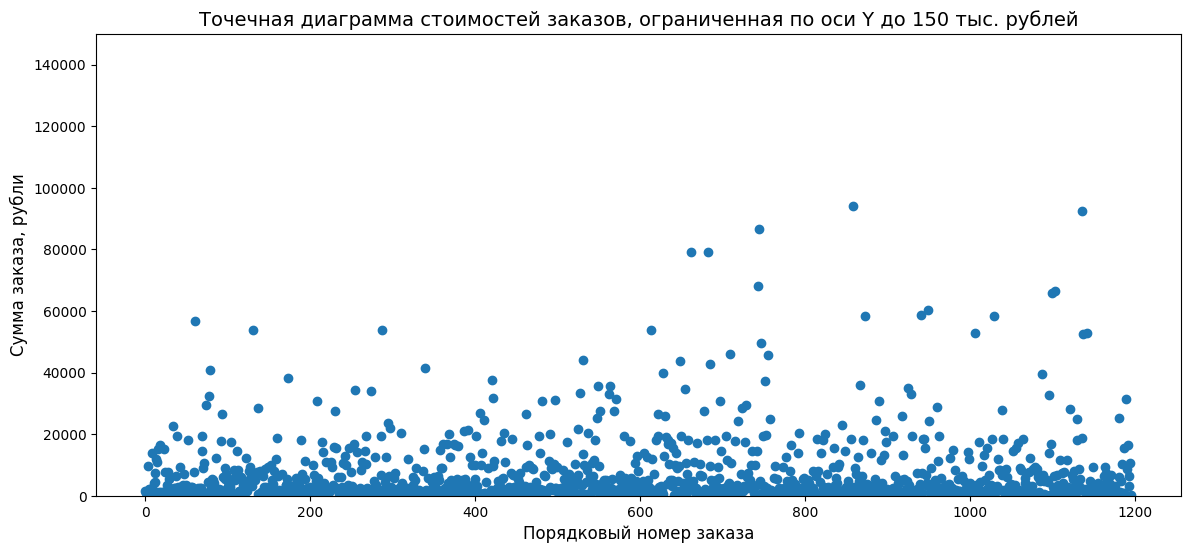

In [194]:
# Ограничим точечную диаграмму по оси Y до 150 тыс. рублей, чтобы детальнее увидеть основную часть значений

x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(14, 6))
plt.scatter(x_values, orders['revenue'])
plt.ylim(0, 150000)

plt.title("Точечная диаграмма стоимостей заказов, ограниченная по оси Y до 150 тыс. рублей", fontsize=14)
plt.xlabel("Порядковый номер заказа", fontsize=12)
plt.ylabel("Сумма заказа, рубли", fontsize=12);

### Задание 2.9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [195]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Не более 5% заказов дороже 28000 рублей. Не более 1% заказов дороже 58234 рублей. Если удалим заказы, сумма которых больше 95 или 99 перцентиля, удалится только один аномальный заказ.
Выберем 58234 рублей за верхнюю границу суммы заказов и отсеим аномальные заказы по ней.

### Задание 2.10. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.

Сформулируем гипотезы.

**Нулевая гипотеза**: Статистически значимых различий в среднем количестве заказов на посетителя между группами по «сырым» данным нет.

**Альтернативная гипотеза**: Статистически значимые различия в среднем количестве заказов на посетителя между группами по «сырым» данным есть.  

Примем уровень статистической значимости, равный 5%.

Применим статистический критерий Манна-Уитни при проверке гипотезы. Применяем данный критерий из-за того, что в таких выборках, как среднее количество заказов на посетителя, есть большие выбросы по сравнению с нормальным распределением.

In [196]:
# Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']. В них для пользователей, которые
# заказывали хотя бы 1 раз, укажем число совершённых заказов.

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

In [197]:
# Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем,
# кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group']=='A']['visitors'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group']=='B']['visitors'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print("P-value: {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1])) # проверяем гипотезу при помощи непараметрического
# теста Уилкоксона-Манна-Уитни. Примем уровень статистической значимости равным 5%.


# Выведем относительный прирост среднего числа заказов группы B относительно группы A по "сырым" данным
print('Относительный прирост среднего числа заказов группы B относительно группы A по "сырым" данным: {0:.3f}'
      .format(sampleB.mean() / sampleA.mean() - 1))

P-value: 0.017
Относительный прирост среднего числа заказов группы B относительно группы A по "сырым" данным: 0.138


Вывод: по «сырым» данным в среднем числе заказов групп A и B различия есть. pvalue = 0.017 меньше 0.05.  Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем.

### Задание 2.11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

**Нулевая гипотеза**: Статистически значимых различий в среднем чеке между группами по «сырым» данным нет.   
**Альтернативная гипотеза**: Статистически значимые различия в среднем чеке между группами по «сырым» данным есть.

Примем уровень статистической значимости, равный 5%.  
Применим статистический критерий Манна-Уитни при проверке гипотезы. Применяем данный критерий из-за того, что в таких выборках, как средный чек, есть большие выбросы по сравнению с нормальным распределением.


In [198]:
# Чтобы рассчитать статистическую значимость различий в среднем чеке, передадим критерию mannwhitneyu() данные о выручке
# с заказов.

print('P-value: {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'],
                                                   orders[orders['group']=='B']['revenue'])[1]))


# Выведем относительный прирост в среднем чеке между группами B и A по "сырым" данным
print('Относительный прирост в среднем чеке между группами B и A по "сырым" данным: {0:.3f}'
      .format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

P-value: 0.729
Относительный прирост в среднем чеке между группами B и A по "сырым" данным: 0.259


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Даже несмотря на то, что относительный прирост в среднем чеке между группами B и A составляет 25.9%.

### Задание 2.12. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.

Найденные ранее 95-й и 99-й перцентили средних чеков равны 28 000 и 58 234 рубля. А 95-й и 99-й перцентили количества заказов на одного пользователя равны 2 и 4 заказа на пользователя.
Примем за аномальных пользователей тех, кто совершил от 4 заказов или совершил заказ дороже 58 234 рублей. Так мы уберём 1% пользователей с наибольшим числом заказов и 1% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 4 — usersWithManyOrders и пользователей, совершивших заказы дороже 58 234 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers.

In [199]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsers['orders'], 99)]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsers['orders'], 99)]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], 99)]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

1099     148427295
949      887908475
744      888512513
1103    1164614297
1136    1307669133
dtype: int64
15


Всего 15 аномальных пользователей.
Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [200]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group']=='A']['visitors'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group']=='B']['visitors'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

**Нулевая гипотеза**: Статистически значимых различий в среднем количестве заказов на посетителя между группами по «очищеным» данным нет.  
**Альтернативная гипотеза**: Статистически значимые различия в среднем количестве заказов на посетителя между группами по «очищеным» данным есть.  

Примем уровень статистической значимости, равный 5%.  
Применим статистический критерий Манна-Уитни при проверке гипотезы. Применяем данный критерий из-за того, что в таких выборках, как среднее количество заказов на посетителя, есть большие выбросы по сравнению с нормальным распределением.


In [201]:
# Применим статистический критерий Манна-Уитни к полученным выборкам. Уровень статистической значимости равен 5%.

print('P-value: {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))


# Выведем относительный прирост среднего числа заказов группы B относительно группы A по очищенным данным
print('Относительный прирост среднего числа заказов группы B относительно группы A по "очищенным" данным: {0:.3f}'
      .format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

P-value: 0.014
Относительный прирост среднего числа заказов группы B относительно группы A по "очищенным" данным: 0.153


Результаты по среднему количеству заказов практически не изменились, pvalue = 0.014. Отвергаем нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет.

### Задание 2.13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

**Нулевая гипотеза**: Статистически значимых различий в среднем чеке между группами по «очищенным» данным нет.  
**Альтернативная гипотеза**: Статистически значимые различия в среднем чеке между группами по «очищенным» данным есть.  

Примем уровень статистической значимости, равный 5%.  
Применим статистический критерий Манна-Уитни при проверке гипотезы. Применяем данный критерий из-за того, что в таких выборках, как средный чек, есть большие выбросы по сравнению с нормальным распределением.


In [202]:
# Применим статистический критерий Манна-Уитни к полученной выборке. Уровень статистической значимости равен 5%.
print(
    'P-value: {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

# Посчитаем относительный прирост среднего числа заказов группы B в сравнении с группой A по очищенным данным
print(
    'Относительный прирост в среднем чеке между группами B и A по "очищенным" данным: {0:.3f}'.format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

P-value: 0.851
Относительный прирост в среднем чеке между группами B и A по "очищенным" данным: -0.006


P-value увеличился и стал равен 0.851 по очищенным данным. Причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет.

### Задание 2.14. Примите решение по результатам теста и объясните его. Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

Остановим тест, зафиксируем победу одной из групп, а именно группы B относительно группы A.  

Мы получили следующие результаты A/B-теста:  
    - Есть статистически значимое различие по среднему количеству заказов на посетителя между группами как по сырым данным, так и после фильтрации аномалий.  
    - По сырым и по очищенным данным нет статистически значимого различия по среднему чеку между группами. Даже несмотря на то, что относительный прирост в среднем чеке между группами B и A по "сырым" данным составляет 25.9%.  
    - График различия по среднему количеству заказов на посетителя между группами сообщает, что результаты группы B лучше группы A и зафиксировались в районе 15%.  
    - График различия среднего чека колеблется. Сделать из этого графика определённые выводы нельзя.  

**Вывод к шагу 2**  
Мы получили следующие результаты успешно проведённого A/B-теста:  
- Есть статистически значимое различие по среднему количеству заказов на посетителя между группами как по сырым данным, так и после фильтрации аномалий.  
- По сырым и по очищенным данным нет статистически значимого различия по среднему чеку между группами. Даже несмотря на то, что относительный прирост в среднем чеке между группами B и A по "сырым" данным составляет 25.9%.  
- График различия конверсии между группами сообщает, что результаты группы B лучше группы A и зафиксировались в районе 15%.
- График различия среднего чека колеблется. Сделать из этого графика определённые выводы нельзя.  

Также важно отметить, что количество покупателей, которые участвовали и в группе A, и в группе B, составляет: 58 человек.

## Шаг 3. Общий вывод  


На первом шаге проекта мы занимались приоритизацией гипотез. При использовании фреймворка ICE самыми приоритетными гипотезами стали гипотезы под номером 8,0,7. При использовании фреймворка RICE самыми приоритетными гипотезами стали гипотезы под номером 7, 2, 0 и 6.
Данные различия в двух видах приоритизации гипотез объясняются тем,что в методе RICE в отличие от ICE помимо таких компонентов, как Impact (влияние), Confidence (уверенность) и Efforts (усилия), применяется компонент Reach (охват). Параметр Reach (охват) показывает, скольких пользователей затронет изменение, которое хотим внести. Первой рекомендую тестировать гипотезу под номером 7, так как она на первом месте при применении метода приоритизации RICE. Рекомендую использовать метод RICE для приоритизации гипотез, так как этот метод учитывает дополнительно такой параметр, как Reach, в отличие от ICE, что даёт более полную картину при приоритизации гипотез.

На втором шаге проекта мы проводили A/B-тест. Получили следующие результаты успешно проведённого A/B-теста:  
- Есть статистически значимое различие по среднему количеству заказов на посетителя между группами как по сырым данным, так и после фильтрации аномалий.  
- По сырым и по очищенным данным нет статистически значимого различия по среднему чеку между группами. Даже несмотря на то, что относительный прирост в среднем чеке между группами B и A по "сырым" данным составляет 25.9%.  
- График различия по среднему количеству заказов на посетителя между группами сообщает, что результаты группы B лучше группы A и зафиксировались в районе 15%.  
- График различия среднего чека колеблется. Сделать из этого графика определённые выводы нельзя.  

Также важно отметить, что количество покупателей, которые участвовали и в группе A, и в группе B, составляет: 58 человек, что является нарушением в распределении пользователей по группам. Поскольку таблица с визитами содержит уже агрегированные данные, можно оставить таких пользователей в тесте.